# Import Library

In [ ]:
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve

# Read Data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the Excel file, skipping the first row and using the second row as the header
data = pd.read_csv("/content/drive/MyDrive/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv", header=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]



Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.



The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [ ]:
# Remove data columns
data.drop(columns=['ID'], inplace=True)

In [ ]:
data[:3]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,is_default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


# EDA


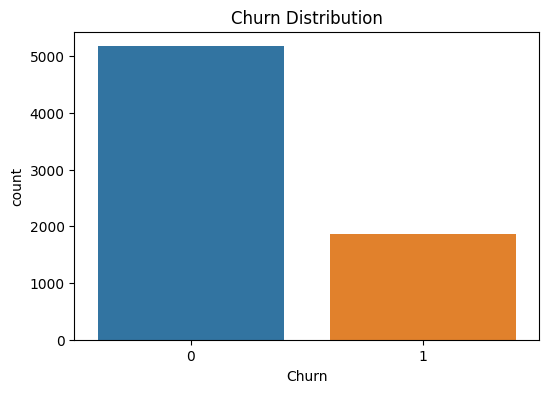

In [ ]:
# Check the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.show()

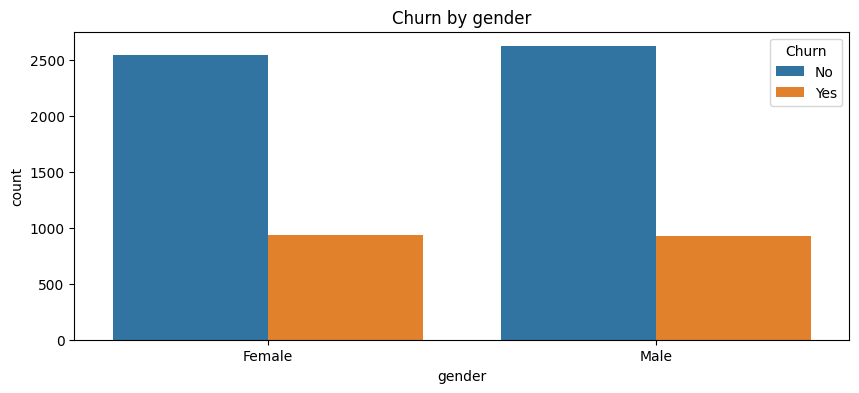

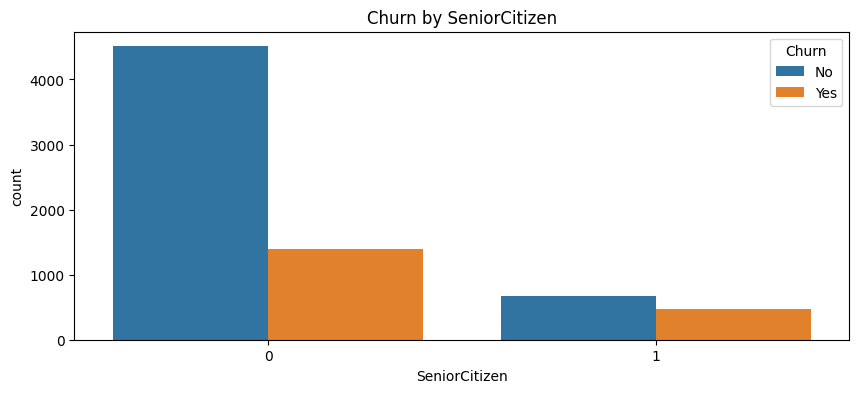

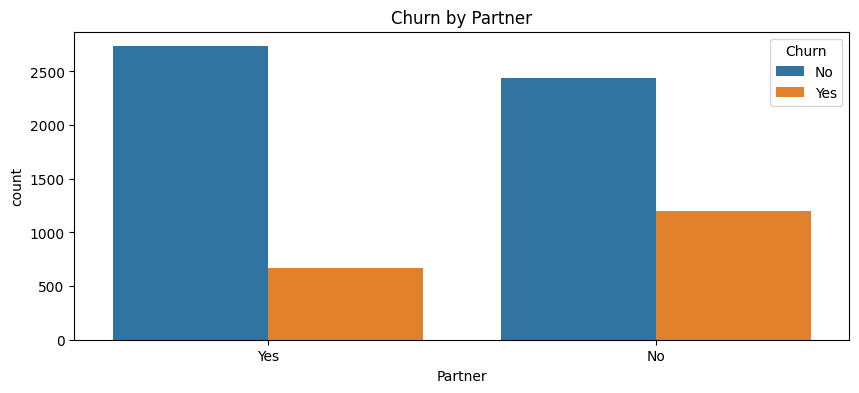

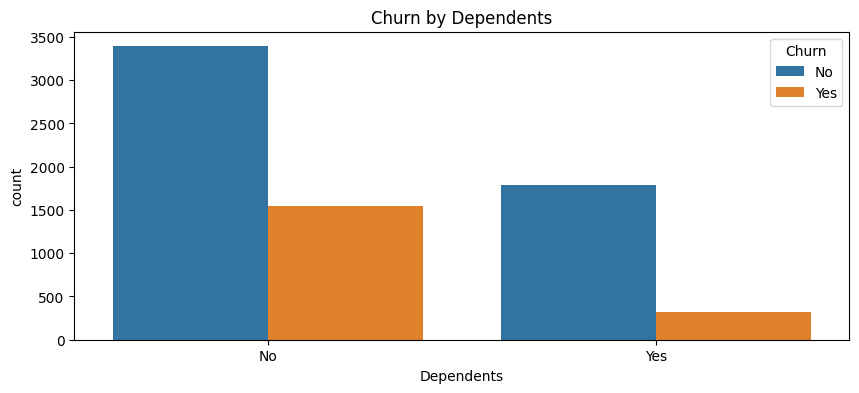

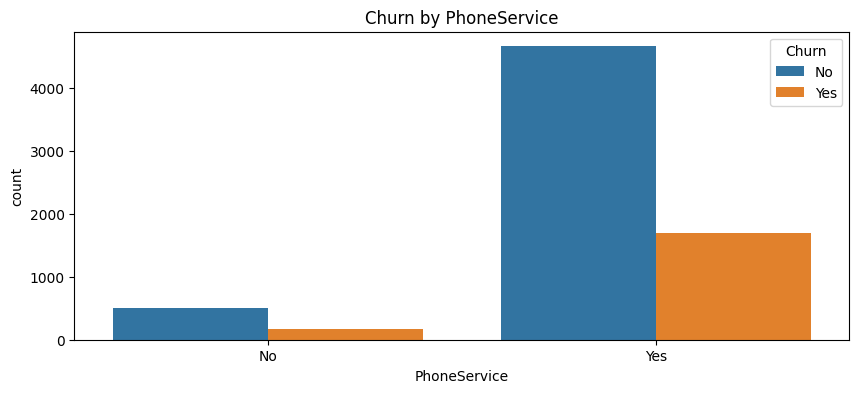

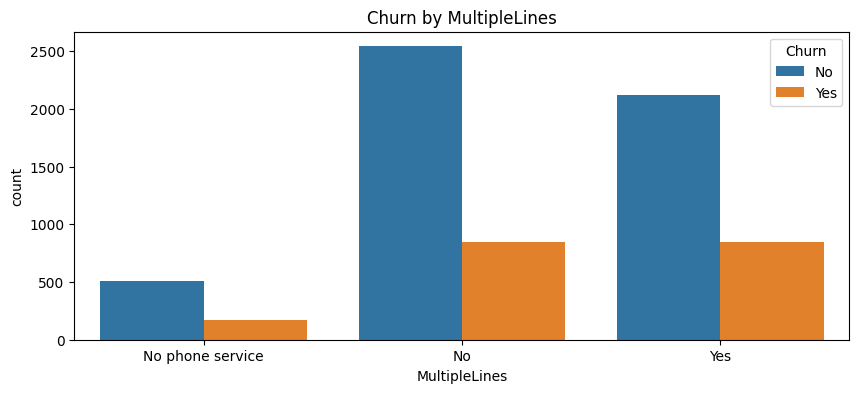

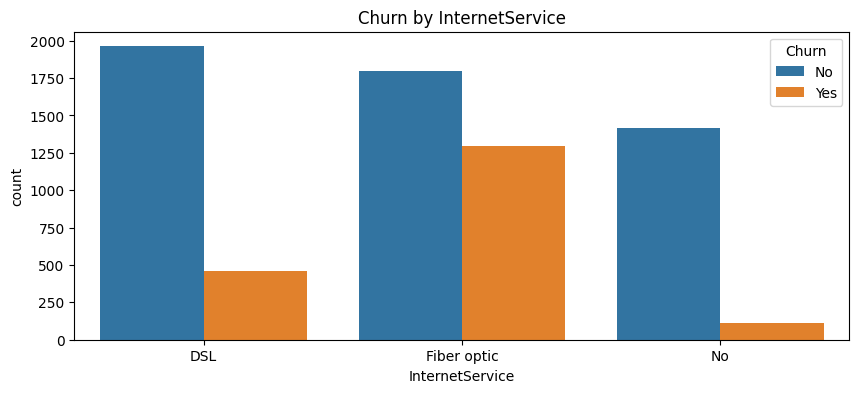

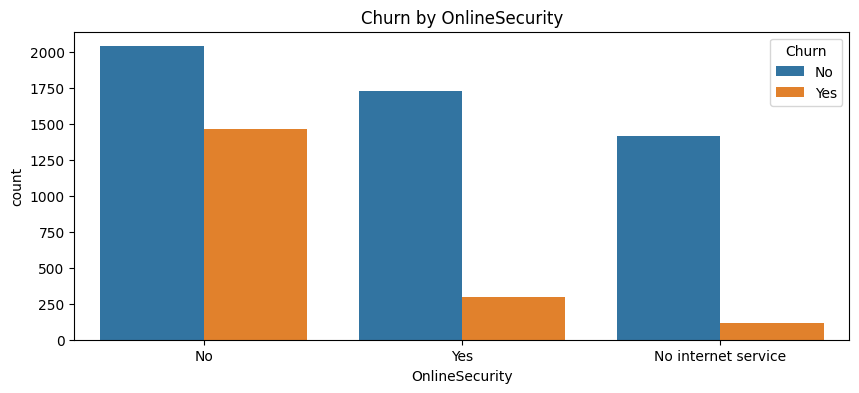

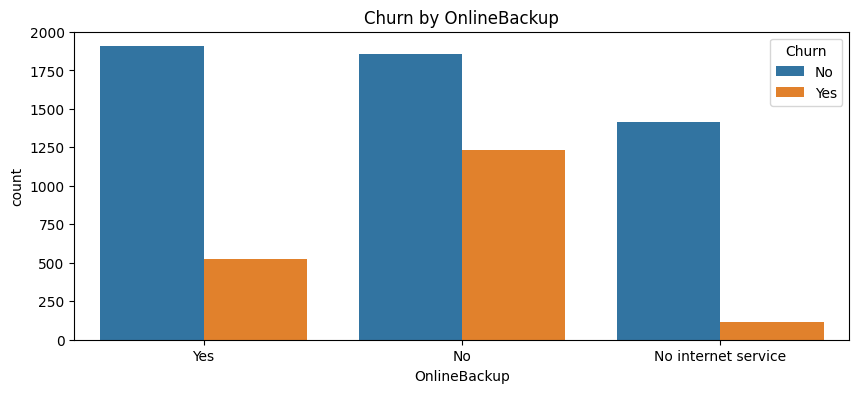

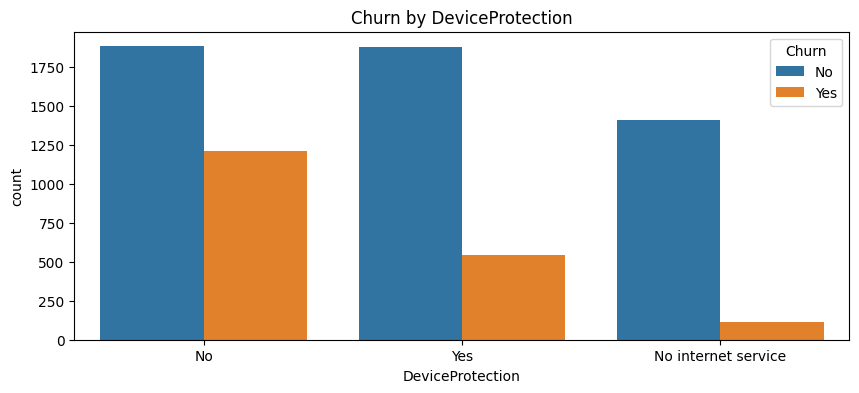

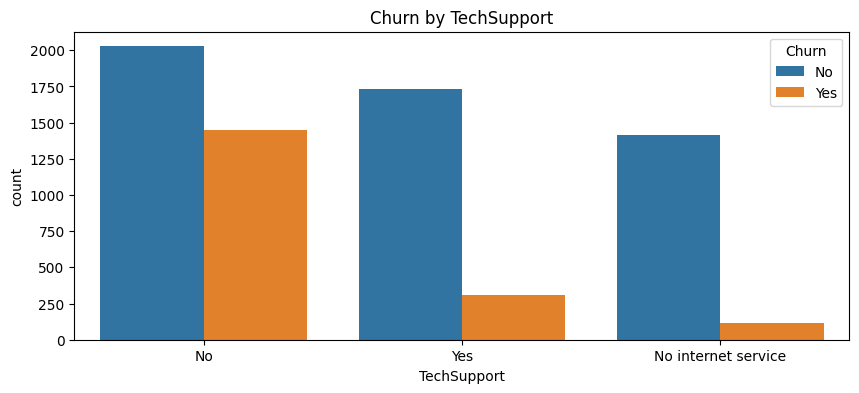

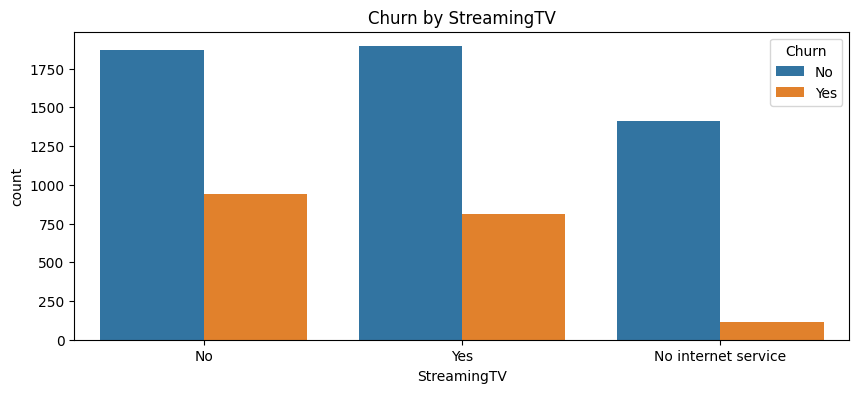

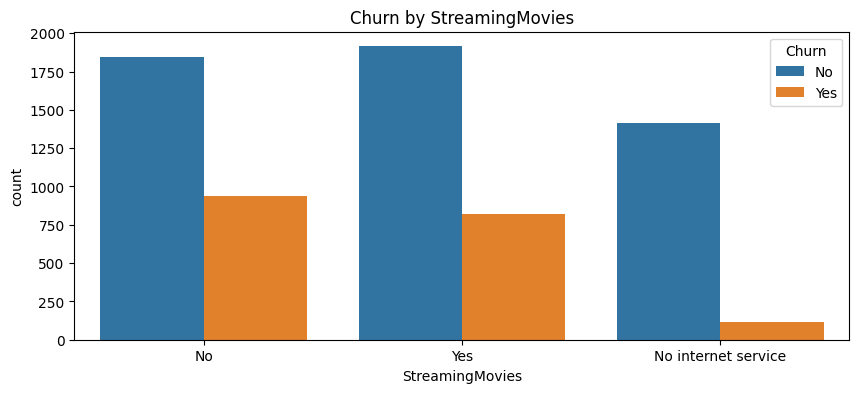

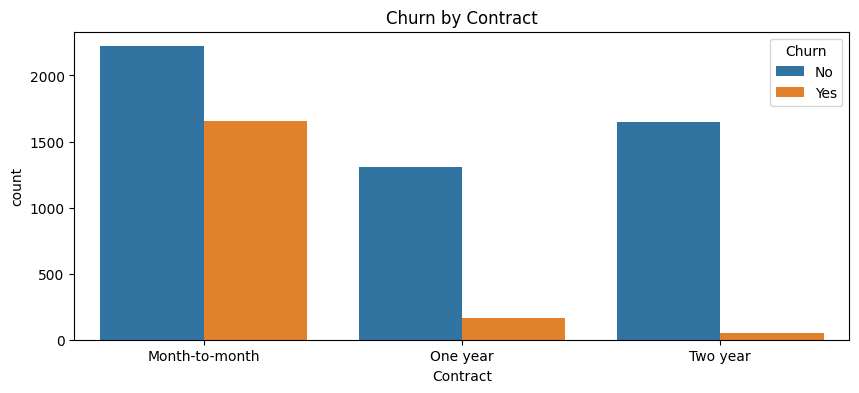

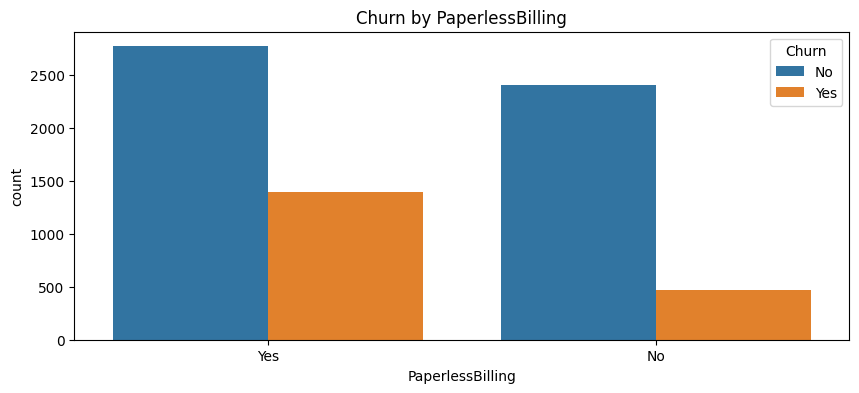

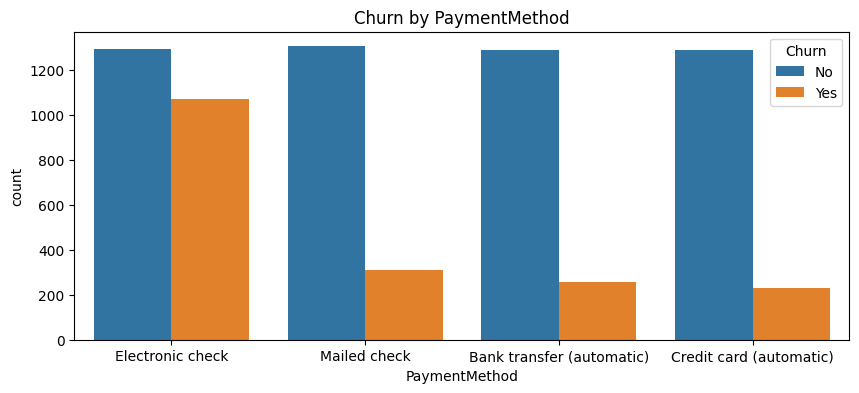

In [ ]:
# Analyze churn rate by categorical features
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, hue='Churn', data=data)
    plt.title(f"Churn by {column}")
    plt.show()

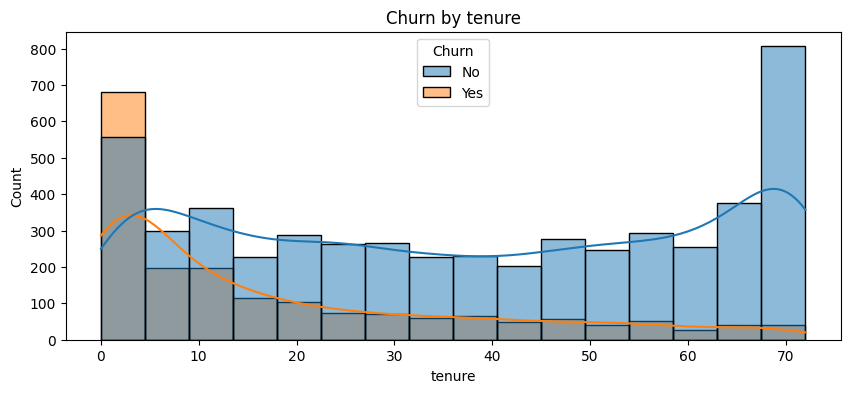

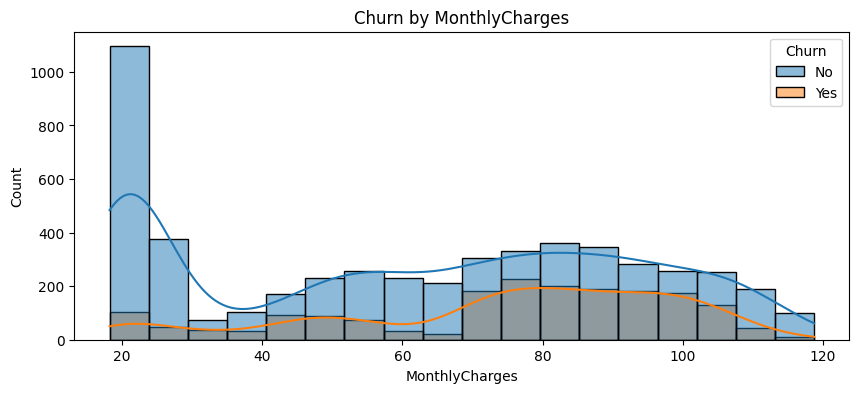

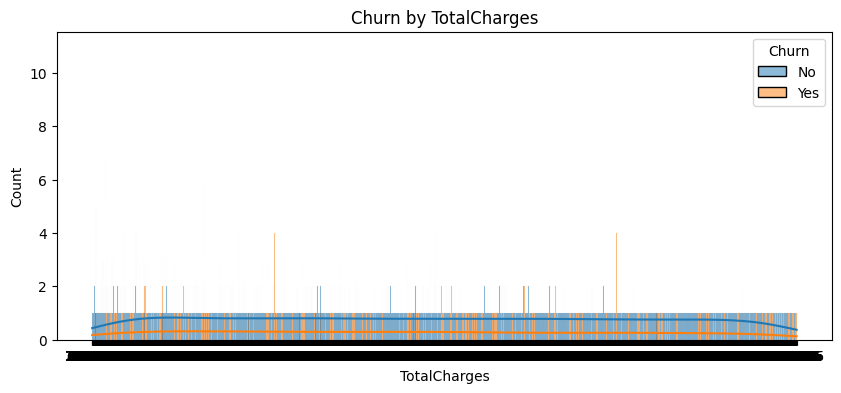

In [ ]:
# Analyze churn rate by numeric features
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in numeric_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(x=column, hue='Churn', data=data, kde=True)
    plt.title(f"Churn by {column}")
    plt.show()

<ipython-input-52-fbaba9935c0d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data[numeric_columns].corr(), annot=True, cmap="coolwarm")


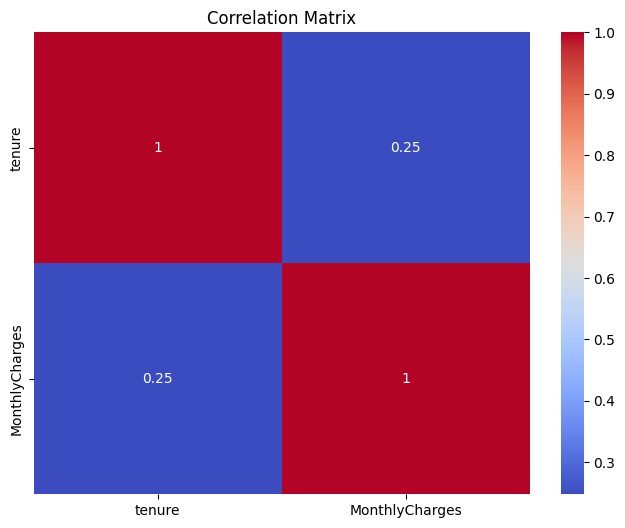

In [ ]:

# Analyze the correlation between numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

<Figure size 1000x400 with 0 Axes>

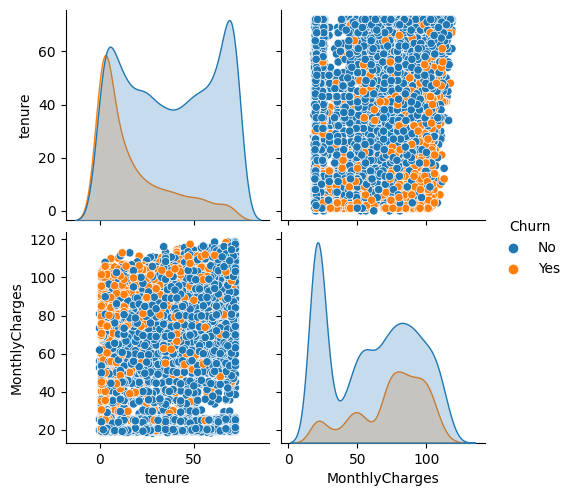

In [ ]:
# Analyze the distribution of numeric features
plt.figure(figsize=(10, 4))
sns.pairplot(data[[*numeric_columns, 'Churn']], hue='Churn')
plt.show()

# Feature Engineering

In [ ]:
# Convert TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

## Categorical Feature Handling

In [ ]:
# One-hot encode categorical features
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [ ]:
# Encode the 'Churn' column
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Model Training

In [ ]:
# Split the dataset into train and test
X = data.drop(['customerID', 'Churn'], axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

In [ ]:
# Calculate the accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, F1-score, and AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)


# Print the results
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("AUC: ", auc)

Accuracy:  0.8211497515968772
Precision:  0.6873065015479877
Recall:  0.5951742627345844
F1-score:  0.6379310344827587
AUC:  0.7488419576221185


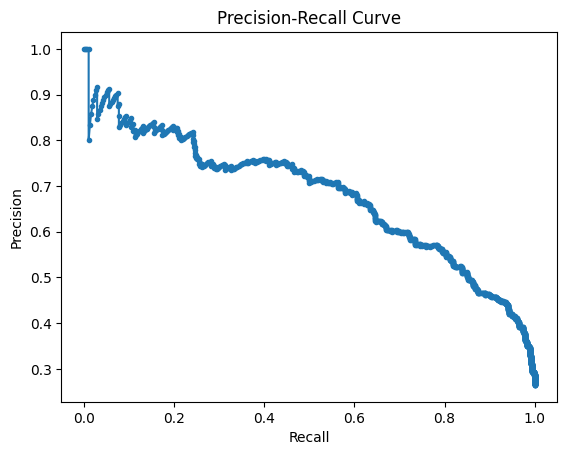

In [ ]:
# Calculate the probability of the target class (class 1)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot the Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# HyperParameter Tuning

for parameter referes https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html




1. `'C'`: This parameter represents the inverse of regularization strength. Smaller values of `C` result in stronger regularization, which can help prevent overfitting by penalizing large coefficients in the model.

2. `'penalty'`: This parameter determines the type of regularization to be applied to the model. Regularization is used to prevent overfitting by penalizing large coefficients in the model. The `'l2'` penalty, also known as Ridge regularization, adds the squared magnitude of the coefficients to the loss function. In this case, you have specified only the `'l2'` penalty.

3. `'solver'`: This parameter specifies the optimization algorithm to be used for training the logistic regression model. Different solvers have different performance characteristics and may be more suitable for specific types of datasets or problems. In this case, you have specified five solvers:

   - `'newton-cg'`: Newton Conjugate Gradient, a second-order optimization method that approximates the Hessian matrix for efficient optimization. Suitable for large datasets and supports L2 regularization.
   - `'lbfgs'`: Limited-memory Broyden-Fletcher-Goldfarb-Shanno, a quasi-Newton method that also approximates the Hessian matrix. Suitable for small to moderately-sized datasets and supports L2 regularization. It is the default solver in scikit-learn.
   - `'liblinear'`: A linear solver that uses the coordinate gradient descent algorithm. Suitable for smaller datasets and supports both L1 and L2 regularization. However, it may have slower convergence for large datasets.
   - `'sag'`: Stochastic Average Gradient descent, an optimization algorithm that uses a random sample of the data at each iteration. Suitable for large datasets and supports L2 regularization.
   - `'saga'`: Stochastic Average Gradient descent with support for both L1 and L2 regularization. Suitable for large datasets and sparse data.

In [ ]:
# Custom parameter grid
param_grid = [
    {'penalty': ['l1'],
     'solver': ['liblinear', 'saga'],
     'C': [0.001, 0.01, 0.1, 1, 10],
     'max_iter': [1000, 5000],
     'class_weight': [None]
    },
    {'penalty': ['l2'],
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
     'C': [ 1, 10, 20, 50],
     'max_iter': [1000, 5000],
     'class_weight': [None]
    },
    {'penalty': ['elasticnet'],
     'solver': ['saga'],
     'C': [0.001, 0.01, 0.1, 1, 10, 50],
     'max_iter': [1000, 5000],
     'class_weight': [None],
     'l1_ratio': [0, 0.3, 0.5, 0.7, 1]
    }
]

# Build and tune the logistic regression model
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Calculate the accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred_best)
# Calculate precision, recall, F1-score, and AUC
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
auc = roc_auc_score(y_test, y_pred_best)

# Print the results
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("AUC: ", auc)

Best Parameters:  {'C': 10, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Accuracy:  0.8022726520525578
Accuracy:  0.8190205819730305
Precision:  0.6820987654320988
Recall:  0.5924932975871313
F1-score:  0.6341463414634146
AUC:  0.7465362240831409


Hyperpram tuning does not helps
